In [3]:
import numpy as np
#from pint import UnitRegistry
import matplotlib.pyplot as plt
import sympy
sympy.init_printing()
%matplotlib inline

# Assignment 1

## Problem 1 (Dirichlet b.c.)

Plot of analytical solution compared with givens solutions for **10 elements**

Analytical solution:

$$u(x) = x \cdot \left(\frac{\delta}{L} + \frac{f}{6E} \left( L^2 -x^2 \right) \right) $$

where:
* $\delta$ : imposed displacement at L in $m$
* L: length of the bar in $m$
* x: position (in $[0,L]$)
* f: distributed force in $N/m^4$
* E: Young's modulus in $N/m^2$

In [4]:
L = 0.1 # [m]
δ = 0.001 # [m]
f = 1e11  # [N/m^4]
E = 1e11  # [N/m^2]

In [5]:
xp = np.linspace(0,L,100)

def u(x):
    u = x*(δ/L + f/(6*E)*(L**2-x**2))
    return u
    
uplot = np.array([u(x) for x in xp])

Nodal displacements (given as solution)

In [6]:
step = 0.01
x_fem = np.arange(0,L+step,step)
u_lin = np.array([0, 0.0001165, 0.000232, 0.0003455, 0.000456,
                  0.0005625, 0.000664, 0.0007595, 0.000848, 0.0009285, 0.001])

#x_quad = np.array([])
u_quad = np.array([0, 0.0001165, 0.000232, 0.0003455, 0.000456, 0.0005625, 0.000664,
                   0.0007595, 0.000848, 0.0009285, 0.001])

#x_cub = np.array([])
#u_cub = np.array([])
u_lin_my = np.array([0, 0.0001165, 0.000232, 0.0003455, 0.000456, 0.0005625, 0.000664,
                     0.0007595, 0.000848, 0.0009285, 0.001])

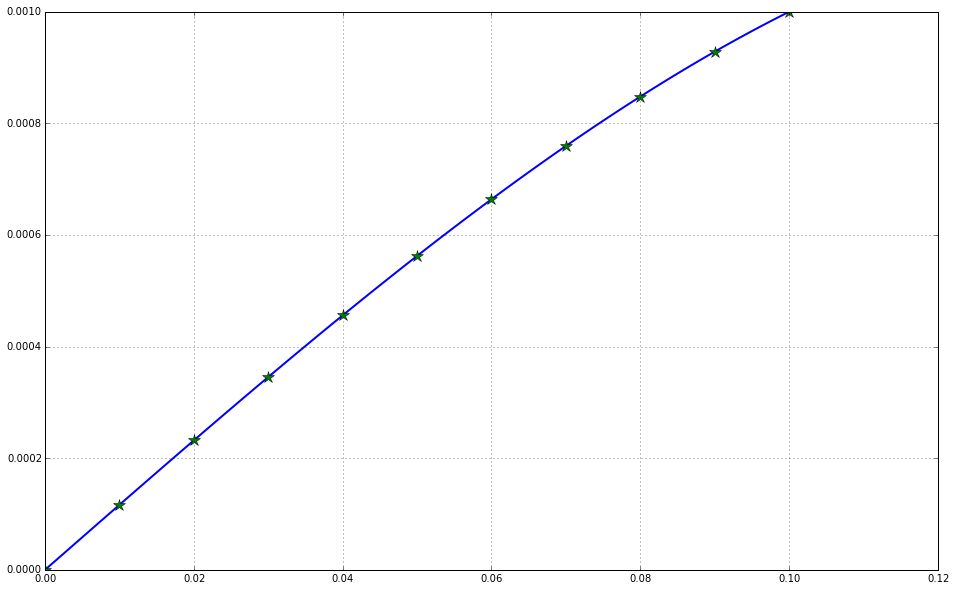

In [7]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(xp, uplot, lw=2.)
plt.plot(x_fem, u_lin, '*', ms = 12.)

plt.grid();

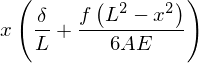

In [8]:
eps, us, deltas, Ls, fs, Es, As, xs = sympy.symbols('epsilon u_s delta L f E A x')
us = xs*(deltas/Ls+fs/(6*Es*As)*(Ls**2-xs**2))
us

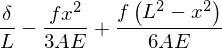

In [9]:
eps = sympy.diff(us,xs)
eps.collect(xs)

In [10]:
np.sqrt(sum([(u(x_fem[i]) - u_lin[i])**2 for i in range(len(x_fem))]))


## Problem 2 (Neumann b.c.)

Analytical solution:

$$u(x) = \frac{x}{E} \cdot \left(\frac{h}{A} + \frac{\bar{f}}{2} \left( L^2 - \frac{x^2}{3} \right) \right) $$

where:
* h : traction at L in $H$
* L: length of the bar in $m$
* x: position (in $[0,L]$)
* $\bar{f}$: distributed force in $N/m^4$
* E: Young's modulus in $N/m^2$
* A: section Area $m^2$

In [14]:
h = 1e6 # traction [N]
A = 1e-4 # Area m^2

In [15]:
def u_2(x):
    u = x/E*(h/A + f/2*(L**2-x**2/3))
    return u

In [16]:
u2plot = np.array([u_2(x) for x in xp])

In [17]:
u2_lin = np.array([0, 0.00104983, 0.00209867, 0.0031455, 0.00418933, 0.00522917,
                   0.006264, 0.00729283, 0.00831467, 0.0093285, 0.0103333])

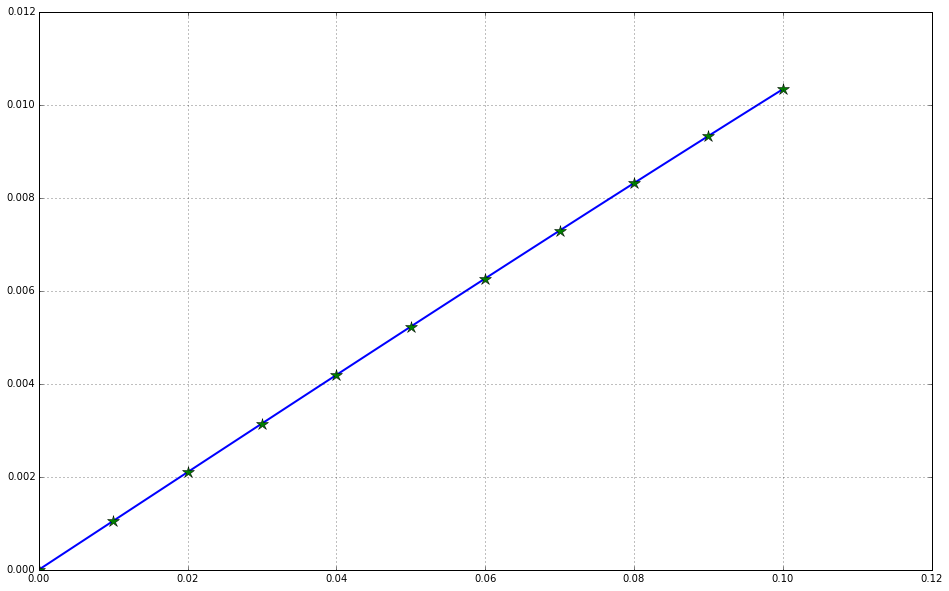

In [18]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(xp, u2plot, lw=2.)
plt.plot(x_fem, u2_lin, '*', ms = 12.)

plt.grid();